In [1]:
%load_ext autoreload
%autoreload 2
#Set root directory
import sys
import os
sys.path.append(os.path.abspath(".."))

# Use gpu
import torch 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('using device: ', device)




using device:  cuda


In [2]:
from senior_thesis.helpers.researchRunner import ResearchRunner
from senior_thesis.agents.chunking.sentenceChunkingAgent import SentenceChunkingAgent
from senior_thesis.agents.embedding.sbertEmbeddingAgent import SBERTEmbeddingAgent
from senior_thesis.agents.clustering.kmeans import KMeansClusteringAgent
from senior_thesis.agents.clustering.hdbscan import HDBSCANClusteringAgent
import sqlite3


In [3]:
##Trial 1: Sentence Chunking + SBERT + KMeans (25 centers)
sentenceChunker = SentenceChunkingAgent()
sbert = SBERTEmbeddingAgent(device=device)
kmeans = KMeansClusteringAgent(200)
#hdbscan = HDBSCANClusteringAgent()

rr = ResearchRunner('test_db', 'sentence_sbert_kmeans_100', sentenceChunker, sbert, kmeans)


<pre style="font-family: Courier; margin:2px; padding-left:20px; line-height:1.2;">✅ ResearchRunner Initialized!</pre>

In [6]:
rr.run_research()

<pre style="font-family: Courier; margin:2px; padding-left:0px; line-height:1.2;">🚀 Starting Research Pipeline...</pre>

<pre style="font-family: Courier; margin:2px; padding-left:20px; line-height:1.2;">🏋️‍♂️ Generating Embeddings</pre>

<pre style="font-family: Courier; margin:2px; padding-left:40px; line-height:1;">✅ Finished generating embeddings! (58000 results in ⏳ 4 min 8 sec)</pre>

<pre style="font-family: Courier; margin:2px; padding-left:20px; line-height:1.2;">📖 Learning topics...</pre>

<pre style="font-family: Courier; margin:2px; padding-left:40px; line-height:1.2;">✅ Topics learned! (⏳ 0:09:18.952531)</pre>

<pre style="font-family: Courier; margin:2px; padding-left:20px; line-height:1.2;">🖊️ Generating Results...</pre>

<pre style="font-family: Courier; margin:2px; padding-left:40px; line-height:1;">✅ Finished! (⏳ 5 min 44 sec)</pre>

<pre style="font-family: Courier; margin:2px; padding-left:20px; line-height:1.2;">📁 Indexing Documents...</pre>

<pre style="font-family: Courier; margin:2px; padding-left:40px; line-height:1;">✅ Finished! (⏳ 4 min 30 sec)</pre>

<pre style="font-family: Courier; margin:2px; padding-left:0px; line-height:1.2;">🎉 Research Completed!</pre>

In [132]:
from senior_thesis.visualization.umap import Umap
from senior_thesis.helpers.embeddings import Embeddings
from senior_thesis.agents.clustering.hdbscan import HDBSCANClusteringAgent
conn = sqlite3.connect('test_db')
embeddings = Embeddings(conn, rr._get_embedding_table_name())


In [133]:
vis3d = Umap(embeddings, rr.clustering_agent, dims=3)

✅ Umap initialized!


In [7]:
vis3d.rotateColors()


NameError: name 'vis3d' is not defined

In [76]:
statsCached = [(statsPlural[i], parameters[i]) for i in range(len(parameters))]

In [109]:
from senior_thesis.agents.clustering.kmeans import KMeansClusteringAgent

parameters = [50, 75, 85, 90, 125, 150, 200, 225, 350, 500]
statsPlural = []

print("Starting...")
for p in parameters:
    found = False
    for cached in statsCached: 
        if cached[1] == p: 
            print("reusing ", p)
            statsPlural.append(cached[0])
            found = True
            break
    if found: 
        continue
    kmeans = KMeansClusteringAgent(p)
    kmeans.pass_embeddings(embeddings)
    kmeans.train()
    statsPlural.append(kmeans.getStats())
    print("finished ", p)

Starting...
reusing  50
reusing  75
reusing  85
reusing  90
reusing  125
reusing  150
reusing  200
reusing  225
reusing  350
reusing  500


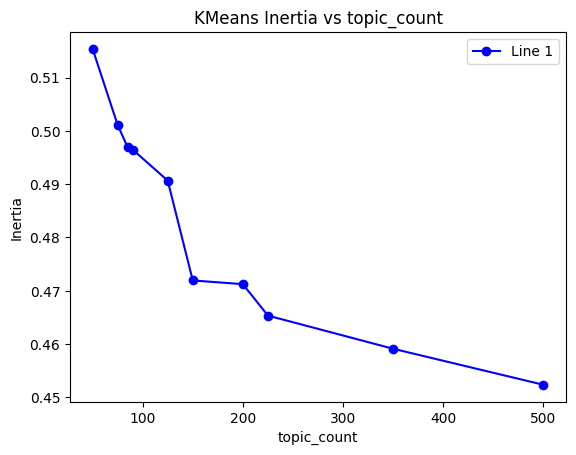

In [110]:
import matplotlib.pyplot as plt

# Sample data
x = parameters
y = [s["Inertia (Compactness)"] for s in statsPlural]
# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line 1")

# Labels and title
plt.xlabel("topic_count")
plt.ylabel("Inertia")
plt.title("KMeans Inertia vs topic_count")

# Show legend
plt.legend()

# Show the graph
plt.show()


In [111]:
import matplotlib.pyplot as plt

# Sample data
x = parameters
y = [s["Silhouette Score (Separation + Compactness)"] for s in statsPlural]
# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line 1")

# Labels and title
plt.xlabel("topic_count")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs topic_count")

# Show legend
plt.legend()

# Show the graph
plt.show()


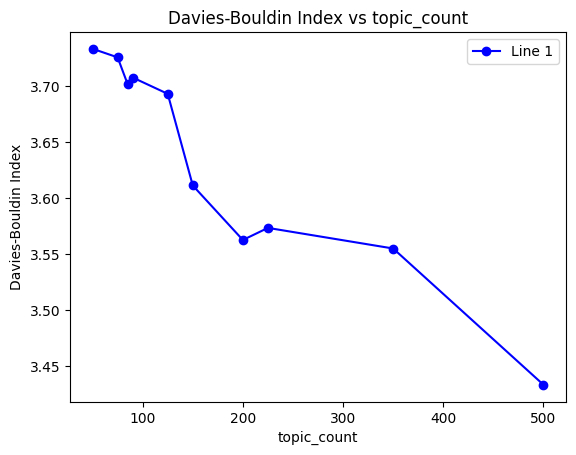

In [112]:
import matplotlib.pyplot as plt

# Sample data
x = parameters
y = [s["Davies-Bouldin Index (Separation)"] for s in statsPlural]
# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line 1")

# Labels and title
plt.xlabel("topic_count")
plt.ylabel("Davies-Bouldin Index")
plt.title("Davies-Bouldin Index vs topic_count")

# Show legend
plt.legend()

# Show the graph
plt.show()


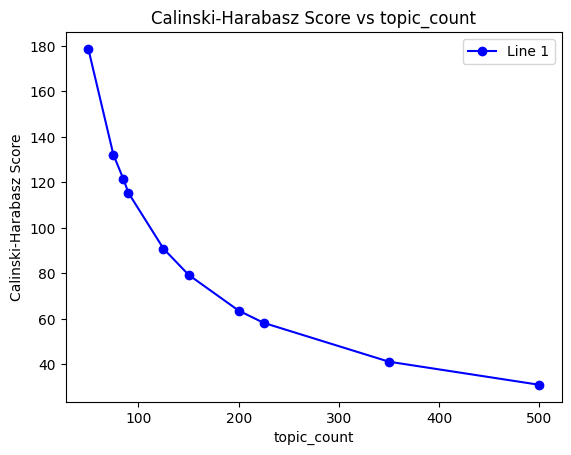

In [131]:
import matplotlib.pyplot as plt

# Sample data
x = parameters
y = [s["Calinski-Harabasz Score (Compactness vs Separation)"] for s in statsPlural]
# Create the plot
plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line 1")

# Labels and title
plt.xlabel("topic_count")
plt.ylabel("Calinski-Harabasz Score")
plt.title("Calinski-Harabasz Score vs topic_count")

# Show legend
plt.legend()

# Show the graph
plt.show()


In [57]:
print(statsPlural[6])

{'Inertia (Compactness)': 0.471936071492347, 'Silhouette Score (Separation + Compactness)': np.float64(0.0288425684036938), 'Davies-Bouldin Index (Separation)': np.float64(3.611298446327987), 'Calinski-Harabasz Score (Compactness vs Separation)': np.float64(79.34315925822901), 'Cluster Counts': {0: 134, 1: 119, 2: 149, 3: 107, 4: 127, 5: 123, 6: 113, 7: 133, 8: 81, 9: 117, 10: 280, 11: 137, 12: 141, 13: 121, 14: 178, 15: 226, 16: 114, 17: 140, 18: 116, 19: 196, 20: 190, 21: 95, 22: 91, 23: 99, 24: 162, 25: 117, 26: 293, 27: 121, 28: 99, 29: 163, 30: 124, 31: 141, 32: 91, 33: 134, 34: 119, 35: 150, 36: 110, 37: 171, 38: 163, 39: 161, 40: 87, 41: 121, 42: 70, 43: 143, 44: 196, 45: 84, 46: 142, 47: 48, 48: 163, 49: 167, 50: 91, 51: 199, 52: 91, 53: 80, 54: 69, 55: 117, 56: 172, 57: 128, 58: 45, 59: 125, 60: 100, 61: 110, 62: 144, 63: 203, 64: 146, 65: 106, 66: 245, 67: 131, 68: 71, 69: 76, 70: 133, 71: 130, 72: 210, 73: 138, 74: 18, 75: 129, 76: 196, 77: 97, 78: 143, 79: 168, 80: 110, 81:

In [ ]:
hdbscan = HDBSCANClusteringAgent()
hdbscan.pass_embeddings(embeddings)
hdbscan.train()

In [ ]:
#UMAP 3d 

vis = 

In [97]:
conn = sqlite3.connect('test_db')
id1 = 982
desc = conn.execute("SELECT description from persons WHERE id = ?", (id1,)).fetchone()[0]

In [98]:
print(desc)
res = rr.query(desc)
res1 = rr.query("I am currently an engineer")


I’m a 27-year-old craftsman who finds joy in the details of construction and the beauty of the built environment. I see myself as a gentleman and a scholar, valuing kindness and intelligence. I’m currently learning TIG welding and appreciate the creativity it brings, even if it means sharing my workspace with an awful lot of donuts. When I’m outdoors hiking or camping, I can’t resist making quirky bird and alien sounds. My home is filled with succulents and prairie grasses, a testament to my passion for nature. 

I thrive on making people feel better and strive to be a good man in everything I do. My days often start with kale and coffee, with support from my grandmother fueling my pursuits. I cherish classic activities like playing board games, attending improv shows, and enjoying dinner with friends, often imagining how buildings can foster connections among people. I may be sweet and a bit odd, but I genuinely enjoy meeting new faces—let’s connect over a drink or meal and see where 

In [99]:
k = 50
print(res[:k])
top_k = [p[0] for p in res[:k]]
#[19, 36, 43, 52, 126, 137, 168, 173, 179]

## Possible evaluation metrics for clustering parameters
# 1) Average number of topic matches 
# 2) Best match retrieval 

## Possible evaluations for chunking 
# 1) Baseline = Straightforward self contained sentences
# 2) Check for complex sentences 
# 3) Check for different wording (semantic sanity check)

## Possible evaluations overall 
# 1) Qualitative compared to baselines 


[(982, 9), (1152, 4), (8603, 4), (12098, 4), (23102, 4), (32346, 4), (36709, 4), (41424, 4), (46259, 4), (51990, 4), (300, 4), (40734, 4), (2558, 4), (5474, 4), (11018, 4), (15306, 4), (26101, 4), (216, 3), (804, 3), (901, 3), (979, 3), (1729, 3), (1955, 3), (2645, 3), (4128, 3), (4429, 3), (5977, 3), (5997, 3), (6248, 3), (6362, 3), (7875, 3), (8159, 3), (8640, 3), (9035, 3), (10193, 3), (10275, 3), (11242, 3), (12340, 3), (12885, 3), (13145, 3), (14143, 3), (14295, 3), (14834, 3), (15592, 3), (17584, 3), (17800, 3), (17961, 3), (19429, 3), (19925, 3), (20058, 3)]


In [101]:
choose = 1

try: 
    conn = sqlite3.connect('test_db')
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM persons WHERE id = ?;", (top_k[choose],))
    print(cursor.fetchone())
finally: 
    conn.close()

(1152, 'I’m a 28-year-old tech enthusiast working in the computer hardware and software field. I’m a clean-living person who doesn’t engage in drug use and values genuine human connections. My weekends are spent exploring every corner of San Francisco, indulging in new cafes and off-the-beaten-path restaurants. Climbing is a passion of mine; I enjoy it a couple of times weekly and love belaying friends. Apart from being skilled at fixing things, I have a knack for coding and baking. \n\nI’ve honed the ability to fall asleep at will, a skill I’m quite proud of. My interests in literature lean toward Latin American fiction, and I aim to read one book from each Nobel laureate. Music is a vital part of my life: I always enjoy the classics like The Beatles and Pink Floyd but am also discovering new sounds. French cuisine tops my list, with a particular love for decadent dishes, and I’m not afraid to admit my soft spot for foie gras. \n\nGood coffee, sunny weather, and great audio systems ar

## conn = sqlite3.connect('test_db')
cursor = conn.cursor()
table_name = f'embeddings_{sentenceChunker.name}_{sbert.name}'
cursor.execute(f'SELECT person_id FROM {table_name}')

In [ ]:


conn.close()

In [ ]:
print(len(es))
print(es[len(es)-1])

In [ ]:
funMap = {}
for e in es: 
    funMap[e[0]] = 1

people = sum(1 for _ in funMap)

In [ ]:
for key in funMap.keys():
    print(key)